In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Czech Barum'

link = 'https://rally-base.com/2023/barum-czech-rally-zlin-2023/?ssId=7790'
startat, no_ss=7790, int(13) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,24,Crugnola,RC2,00:00:57.2,81.82 0.00,00:00:00.0 00:00:00.0,1,Roma Capitale,1
2,2,4,Lukyanuk,RC2,00:00:57.5,81.39 0.23,00:00:00.3 00:00:00.3,1,Roma Capitale,2
3,3,59,Aragno F.,RC2,00:00:57.7,81.11 0.38,00:00:00.5 00:00:00.2,1,Roma Capitale,3
4,4,21,Basso G.,RC2,00:00:57.8,80.97 0.46,00:00:00.6 00:00:00.1,1,Roma Capitale,4
5,5,3,Mabellini,RC2,00:00:58.1,80.55 0.69,00:00:00.9 00:00:00.3,1,Roma Capitale,5
...,...,...,...,...,...,...,...,...,...,...
66,66,53,Tomov A.,RC5,00:04:32.4,88.79 7.59,00:00:51.0 00:00:03.0,13,Roma Capitale,66
67,67,78,Ragnoli I,RC3,00:04:37.1,87.29 8.29,00:00:55.7 00:00:04.7,13,Roma Capitale,67
68,68,40,Raftery A,RC4,00:04:39.1,86.66 8.59,00:00:57.7 00:00:02.0,13,Roma Capitale,68
69,69,86,Cazzaro N,RC4,00:04:39.3,86.60 8.62,00:00:57.9 00:00:00.2,13,Roma Capitale,69


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [17]:

rally2023_ClassView2

0                                  Pos.                                      \
ss                                   1   2   3   4   5   6   7   8   9   10   
No. Crew       Group Race                                                     
1   Paddon  Ha RC2   Roma Capitale    9   4   4   6   7  14   7   4   1   3   
2   Llarena  E RC2   Roma Capitale   20   8   6  12   8   9  12   4   5  14   
3   Mabellini  RC2   Roma Capitale    5   5   7   6   6   6   9   7   7   8   
4   Lukyanuk   RC2   Roma Capitale    2   7   5   3  86   7   3  23  15  78   
5   Sesks  M.  RC2   Roma Capitale   10  12  10  88  87  84  81   -   -   -   
6   Franceschi RC2   Roma Capitale   18  18  17  19  12   8  15  17  17  18   
7   Heikkilä   RC2   Roma Capitale   33  22  11  12  13  12  18  16   9   -   
8   Bonato  Yo RC2   Roma Capitale    6   2   2   5   4   3   5   1   2   2   
9   Mareš  Fil RC2   Roma Capitale   11  13   8   3   5   4   4   6  12  11   
10  Wagner  Si RC2   Roma Capitale   16  15  15  15  18  13  16  13   8  10   
11  Joona  Lau RC2   Roma Capitale   17  14  21  11  20  21  13  19  18  20   
12  Tempestini RC2   Roma Capitale   29  16  18  15  17  18  13  21  21  13   
14  Grzyb  Grz RC2   Roma Capitale   26   9  12  10  10  15  10   8  16  12   
15  Campedelli RC2   Roma Capitale    8   5   9   9   3   5   5   8   6   6   
16  Csomós  Mi RC2   Roma Capitale   22   9  13   8  33  11   8  11  20   9   
18  Battistoll RC2   Roma Capitale   14  20  16  15  16  17  17  18  14  17   
19  László  Ma RC2   Roma Capitale   21  25  23  25  21  26  24  27  26  22   
20  O'Brien  P RC2   Roma Capitale   33  28  42  30  26  29  30  31  38  26   
21  Basso  G.  RC2   Roma Capitale    4   3   3   2   2   2   2   3   4   4   
22  De Tommaso RC2   Roma Capitale   91   -   -   -   -   -   -   -   -   -   
23  Andolfi  F RC2   Roma Capitale    6  16  20  55   9  10  11  11  10   5   
24  Crugnola   RC2   Roma Capitale    1   1   1   1   1   1   1   2   3   1   
25  Mazzocchi  RC2   Roma Capitale   24  19  40  18  14  19  22  20  24  15   
26  Rusce  Ant RC2   Roma Capitale   28  24  25  23  24  80  25  25  25  25   
27  von Thurn  RC2   Roma Capitale   32  29  26  22  23  24  23  24  22  19   
28  Scattolon  RC2   Roma Capitale   12  23  19  14  19  20  19  13  19   -   
29  Somaschini RC2   Roma Capitale   39  32  30  31  29  38  32  30  48  30   
30  Cuzma  Bog RC2   Roma Capitale   48  53  47  35  35  40  39  33  35  32   
31  Kołtun  J. RC2   Roma Capitale   43  30  31  28  77  30  81   -   -   -   
56  Bottarelli RC2   Roma Capitale   13  21  22  21  15  22  21  15  13  16   
57  Ferrarotti RC2   Roma Capitale   35  26  24  27  24  23  28  26  28  21   
58  Avbelj  Bo RC2   Roma Capitale   14  11  13  20  11  16  20   8  11   7   
59  Aragno  F. RC2   Roma Capitale    3  27  28  25  22  25  27  22  27  24   
70  Mauri  Mau RC2   Roma Capitale   24  33  32  31  31  39  31  32  45  42   
71  Brazzoli   RC2   Roma Capitale   41  37  45  40  41  37  40  44  56  35   
72  Angelucci  RC2   Roma Capitale   36  34  90  88  87  84  81  34  37  28   
73  Caires  Mi RC2   Roma Capitale   29  43  34  35  61  82  81  45  50  47   
74  Manole  Mi RC2   Roma Capitale   60  60  55  61  58  54  57  54  49  50   
75  László  Z. RC2   Roma Capitale   42  48  48  48  52  50  46  48  52  49   
76  Tiramani   RC2   Roma Capitale   26  40  29  24  27  28  26  28  29  27   
77  Perosino   RC2   Roma Capitale   87  83  83  35  73  84  81  76  77  75   

0                                               
ss                                  11  12  13  
No. Crew       Group Race                       
1   Paddon  Ha RC2   Roma Capitale   3   1   7  
2   Llarena  E RC2   Roma Capitale  18   8  14  
3   Mabellini  RC2   Roma Capitale   5  55   1  
4   Lukyanuk   RC2   Roma Capitale  16   5   6  
5   Sesks  M.  RC2   Roma Capitale   -   -   -  
6   Franceschi RC2   Roma Capitale  10  15   -  
7   Heikkilä   RC2   Roma Capitale   -   -   -  
8   Bonato  Yo RC2   Roma Capital

In [18]:
rally2023_ClassView

0                                  Pos.                                      \
ss                                   1   2   3   4   5   6   7   8   9   10   
No. Crew       Group Race                                                     
1   Paddon  Ha RC2   Roma Capitale    9   4   4   6   7  14   7   4   1   3   
2   Llarena  E RC2   Roma Capitale   20   8   6  12   8   9  12   4   5  14   
3   Mabellini  RC2   Roma Capitale    5   5   7   6   6   6   9   7   7   8   
4   Lukyanuk   RC2   Roma Capitale    2   7   5   3  86   7   3  23  15  78   
5   Sesks  M.  RC2   Roma Capitale   10  12  10  88  87  84  81   -   -   -   
...                                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
102 Zanin  Mar RC5   Roma Capitale   60  80  82  81  71  74  74  74  65  67   
103 La Notte   RC5   Roma Capitale   72  87  87  85  83  81  77  78  80  77   
104 Campagna   RC5   Roma Capitale   71  89  64  77  67  58  70   -   -   -   
105 De Antoni  RC5   Roma Capitale   52  81  54  57  57  56  54   -   -   -   
106 Gonella  A RC5   Roma Capitale   57  66  73  74  69  69  68   -   -   -   

0                                               
ss                                  11  12  13  
No. Crew       Group Race                       
1   Paddon  Ha RC2   Roma Capitale   3   1   7  
2   Llarena  E RC2   Roma Capitale  18   8  14  
3   Mabellini  RC2   Roma Capitale   5  55   1  
4   Lukyanuk   RC2   Roma Capitale  16   5   6  
5   Sesks  M.  RC2   Roma Capitale   -   -   -  
...                                 ..  ..  ..  
102 Zanin  Mar RC5   Roma Capitale  64  56  55  
103 La Notte   RC5   Roma Capitale  77   -   -  
104 Campagna   RC5   Roma Capitale   -   -   -  
105 De Antoni  RC5   Roma Capitale   -   -   -  
106 Gonella  A RC5   Roma Capitale   -   -   -  

[91 rows x 13 columns]

In [19]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,24,Crugnola,RC2,1,Roma Capitale,1,57.2
2,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5
3,59,Aragno F.,RC2,1,Roma Capitale,3,57.7
4,21,Basso G.,RC2,1,Roma Capitale,4,57.8
5,3,Mabellini,RC2,1,Roma Capitale,5,58.1
...,...,...,...,...,...,...,...
66,53,Tomov A.,RC5,13,Roma Capitale,66,272.4
67,78,Ragnoli I,RC3,13,Roma Capitale,67,277.1
68,40,Raftery A,RC4,13,Roma Capitale,68,279.1
69,86,Cazzaro N,RC4,13,Roma Capitale,69,279.3


In [20]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race          ss          
Roma Capitale 1       57.2
              2      395.0
              3     1168.6
              4      256.9
              5      395.5
              6     1162.9
              7      255.7
              8      221.4
              9      266.0
              10    1037.7
              11     263.8
              12    1041.6
              13     221.4

In [21]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,24,Crugnola,RC2,1,Roma Capitale,1,57.2,57.2
1,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5,57.2
2,59,Aragno F.,RC2,1,Roma Capitale,3,57.7,57.2
3,21,Basso G.,RC2,1,Roma Capitale,4,57.8,57.2
4,3,Mabellini,RC2,1,Roma Capitale,5,58.1,57.2
...,...,...,...,...,...,...,...,...
1087,53,Tomov A.,RC5,13,Roma Capitale,66,272.4,221.4
1088,78,Ragnoli I,RC3,13,Roma Capitale,67,277.1,221.4
1089,40,Raftery A,RC4,13,Roma Capitale,68,279.1,221.4
1090,86,Cazzaro N,RC4,13,Roma Capitale,69,279.3,221.4


In [22]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,24,Crugnola,RC2,1,Roma Capitale,1,57.2,57.2,0.0,0.000000,01
1,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5,57.2,0.3,0.524476,01
2,59,Aragno F.,RC2,1,Roma Capitale,3,57.7,57.2,0.5,0.874126,01
3,21,Basso G.,RC2,1,Roma Capitale,4,57.8,57.2,0.6,1.048951,01
4,3,Mabellini,RC2,1,Roma Capitale,5,58.1,57.2,0.9,1.573427,01
...,...,...,...,...,...,...,...,...,...,...,...
1087,53,Tomov A.,RC5,13,Roma Capitale,66,272.4,221.4,51.0,23.035230,13
1088,78,Ragnoli I,RC3,13,Roma Capitale,67,277.1,221.4,55.7,25.158085,13
1089,40,Raftery A,RC4,13,Roma Capitale,68,279.1,221.4,57.7,26.061427,13
1090,86,Cazzaro N,RC4,13,Roma Capitale,69,279.3,221.4,57.9,26.151762,13


In [24]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,24,Crugnola,RC2,1,Roma Capitale,1,57.2,57.2,0.0,0.000000,01
1,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5,57.2,0.3,0.524476,01
2,59,Aragno F.,RC2,1,Roma Capitale,3,57.7,57.2,0.5,0.874126,01
3,21,Basso G.,RC2,1,Roma Capitale,4,57.8,57.2,0.6,1.048951,01
4,3,Mabellini,RC2,1,Roma Capitale,5,58.1,57.2,0.9,1.573427,01
...,...,...,...,...,...,...,...,...,...,...,...
1049,70,Mauri Mau,RC2,13,Roma Capitale,28,237.2,221.4,15.8,7.136405,13
1050,75,László Z.,RC2,13,Roma Capitale,29,239.7,221.4,18.3,8.265583,13
1058,73,Caires Mi,RC2,13,Roma Capitale,37,244.1,221.4,22.7,10.252936,13
1059,71,Brazzoli,RC2,13,Roma Capitale,38,244.5,221.4,23.1,10.433604,13


In [25]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,24,Crugnola,RC2,1,Roma Capitale,1,57.2,57.2,0.0,0.000000,01
1,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5,57.2,0.3,0.524476,01
2,59,Aragno F.,RC2,1,Roma Capitale,3,57.7,57.2,0.5,0.874126,01
3,21,Basso G.,RC2,1,Roma Capitale,4,57.8,57.2,0.6,1.048951,01
4,3,Mabellini,RC2,1,Roma Capitale,5,58.1,57.2,0.9,1.573427,01
...,...,...,...,...,...,...,...,...,...,...,...
1049,70,Mauri Mau,RC2,13,Roma Capitale,28,237.2,221.4,15.8,7.136405,13
1050,75,László Z.,RC2,13,Roma Capitale,29,239.7,221.4,18.3,8.265583,13
1058,73,Caires Mi,RC2,13,Roma Capitale,37,244.1,221.4,22.7,10.252936,13
1059,71,Brazzoli,RC2,13,Roma Capitale,38,244.5,221.4,23.1,10.433604,13


In [26]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Roma Capitale                                                       \
SS.                   01    02     03     04     05     06     07    08    09   
Crew                                                                            
Andolfi  F           1.1  10.0   41.0   36.1    5.8   24.0    4.9   3.7   5.1   
Angelucci            6.2  29.8  600.0  600.0  600.0  600.0  600.0  17.7  28.4   
Aragno  F.           0.5  18.2   71.3   12.0   15.1   49.2   11.7   7.9  15.7   
Avbelj  Bo           2.6   6.8   30.3    9.3    6.2   30.3    9.0   3.0   5.3   
Basso  G.            0.6   4.0    6.9    1.6    1.2    4.9    1.0   0.5   1.1   
Battistoll           2.6  10.9   34.8    7.5    8.6   31.6    6.4   5.0   6.2   
Bonato  Yo           1.1   1.5    5.4    2.9    3.0    7.0    2.8   0.0   0.6   
Bottarelli           2.3  11.2   47.7    9.4    8.1   45.2    9.1   4.4   5.6   
Brazzoli             7.4  36.7  133.2   28.1   38.7  119.4   27.8  22.3  38.8   
Caires  Mi           4.9  39.1  112.8   25.4   57.7  542.9  600.0  22.5  36.0   
Campedelli           1.6   5.4   23.4    3.8    2.4   16.3    2.8   3.0   3.3   
Crugnola             0.0   0.0    0.0    0.0    0.0    0.0    0.0   0.4   0.7   
Csomós  Mi           4.3   6.6   30.3    3.6   32.7   25.1    3.7   3.7   9.3   
Cuzma  Bog           8.8  45.7  140.7   25.4   34.0  124.8   27.5  15.3  26.8   
De Tommaso         600.0   NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   
Ferrarotti           5.7  18.1   58.1   14.6   15.4   47.6   14.3   9.9  15.8   
Franceschi           3.3  10.5   35.0    8.0    7.4   22.7    5.9   4.8   7.7   
Grzyb  Grz           4.7   6.6   30.0    4.4    5.9   29.4    4.6   3.0   6.5   
Heikkilä             5.4  12.8   27.0    5.6    7.7   25.4    6.5   4.5   4.9   
Joona  Lau           3.2   8.7   44.1    5.5   11.9   38.0    5.7   6.1   8.2   
Kołtun  J.           8.1  24.6  102.3   14.9   81.1   90.2  600.0   NaN   NaN   
Llarena  E           3.6   6.4   17.6    5.6    5.6   22.8    5.6   2.0   3.0   
Lukyanuk             0.3   6.0   16.0    1.8  304.9   20.0    1.5   8.3   6.4   
László  Ma           4.1  17.4   57.2   12.0   14.9   55.5   10.4  10.1  14.8   
László  Z.           7.5  42.5  142.4   30.0   47.5  155.4   29.7  23.8  36.7   
Mabellini            0.9   5.4   19.0    3.4    4.1   19.7    4.1   2.5   4.0   
Manole  Mi          10.9  54.3  160.3   39.2   56.1  163.9   38.9  26.1  35.5   
Mareš  Fil           2.0   7.9   21.6    1.8    3.9   15.3    1.9   2.3   5.4   
Mauri  Mau           4.6  29.5  109.0   19.8   31.6  121.7   19.5  14.3  33.2   
Mazzocchi            4.6  10.8  117.1    7.8    7.9   36.1    9.3   7.2  13.7   
O'Brien  P           5.4  20.3  122.7   17.7   20.7   85.5   16.4  14.2  28.9   
Paddon  Ha           1.8   4.7    9.6    3.4    4.3   28.9    3.4   2.0   0.0   
Perosino            24.4  85.7  260.7   25.4   72.8  600.0  600.0  41.3  65.9   
Rusce  Ant           4.8  15.9   61.5   11.2   15.4  319.5   11.3   9.1  14.5   
Scattolon            2.1  15.6   38.1    7.2   10.4   37.9    7.6   4.1   9.1   
Sesks  M.            1.9   7.0   25.0  600.0  600.0  600.0  600.0   NaN   NaN   
Somaschini           7.2  28.2   98.8   19.8   30.2  121.6   22.6  14.0  35.1   
Tempestini           4.9  10.0   35.7    7.5    9.0   33.4    5.7   7.5  10.3   
Tiramani             4.7  38.3   72.0   11.8   22.5   70.6   11.5  10.6  19.4   
Wagner  Si           2.8   9.2   30.9    7.5    9.4   28.0    6.1   4.1   4.2   
von Thurn            5.3  20.7   61.8   10.8   15.2   49.1    9.8   8.4  11.6   

Race                                  
SS.            10    11     12    13  
Crew                                  
Andolfi  F    8.0   4.0    NaN   NaN  
Angelucci    83.1  27.8  623.7   NaN  
Aragno  F.   61.9  13.2   64.8   8.6  
Avbelj  Bo   13.8   5.8   11.0   2.2  
Basso  G.     5.2   1.0    2.6   4.0  
Battistoll   32.1   5.0  275.8   2.3  
Bonato  Yo    0.5   3.3  114.8   1.0  
Bottarelli   29.6   5.0  149.8   4.4  
Brazzo

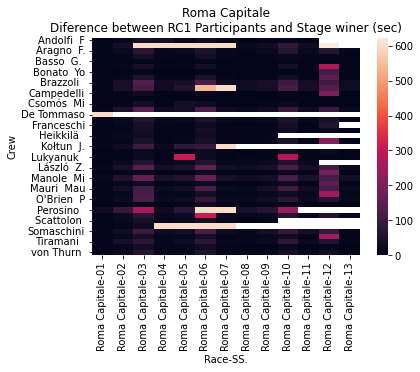

In [27]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

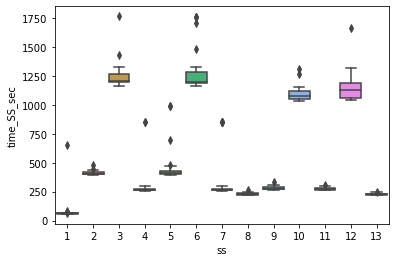

In [28]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

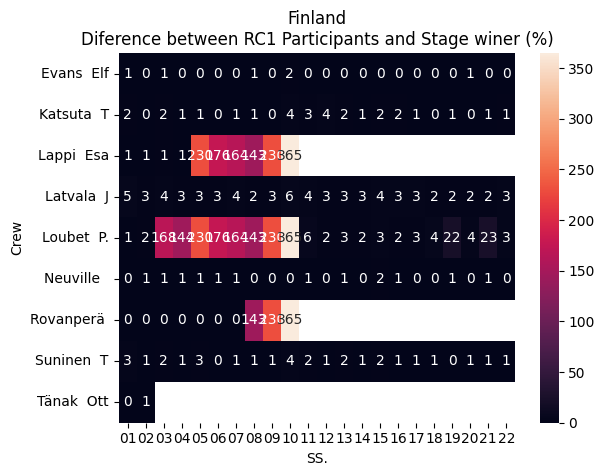

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")